<h1 style="color:blue;">Scenario 5 notebook   </h1>     

- C1.S5.Py01	Create a Simple Regression Model Using statsmodels
- C1.S5.Py02	How to create residuals and export to a DataFrame
- C1.S5.Py03	Graphically looking at y and its residuals

In [32]:
#Code Block 1

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



#style options 

%matplotlib inline  
#if you want graphs to automatically without plt.show

pd.set_option('display.max_columns',500) #allows for up to 500 columns to be displayed when viewing a dataframe

plt.style.use('seaborn-v0_8') #a style that can be used for plots - see style reference above



In [34]:
#Code Block 2
df = pd.read_csv('data/Scenario5.csv', index_col = 0, header=0) 
    #DOES set the first column to the index
    # and the top row as the headers

In [36]:
#Code Block 3
df.head(3)

Member ID  Loan ID Origination Date  Interest Rate  Amount Funded  \
6     735990   789789          2/17/19           7.62           7500   
8     778284   746115         12/13/18           6.03          10000   
4     603349   885844         11/17/19          16.29          15000   

   Total Debt  Annual Income  Revolving Accounts  Total Revolving Credit Line  \
6    265809.0          92000              6419.0                      43000.0   
8    152402.0         108000              4653.0                      46100.0   
4    227890.0          72000             11702.0                      26300.0   

   Term Grade     Employee Title  Length of Employment Home Ownership  \
6    36     A            TD Bank                   4.0       MORTGAGE   
8    36     A  FlightStats, Inc.                   1.0       MORTGAGE   
4    36     C                NaN                   NaN       MORTGAGE   

  Income Verification      Loan Purpose Zip Code of Residence  \
6                 NaN       credit_card                 030xx   
8                 NaN  home_improvement                 750xx   
4            Verified             house                 341xx   

  State of Residence  Delinquencies Past 24 Months  \
6                 NH                           NaN   
8                 TX                           NaN   
4                 FL                           NaN   

   Credit Inquires Last 6 Months  Open Accounts  TermNum TermString  Day  \
6                              2              5       37  36 months    6   
8                              0             10       37  36 months    3   
4                              1             18       37  36 months    6   

   Month  Year  
6      2  2019  
8     12  2018  
4     11  2019

<h2 style="color:blue;">C1.S5.Py01 - Creating a Simple Regession Model using statsmodels</h2>    


### How to import and use statsmodels
https://anaconda.org/anaconda/statsmodels

In [40]:
#Code Block 4
import statsmodels
import statsmodels.api as sm

### Using a simple dataset (tips)

In [43]:
#Code Block 5
df_tips = sns.load_dataset('tips')
df_tips

total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]

<Axes: xlabel='total_bill', ylabel='tip'>

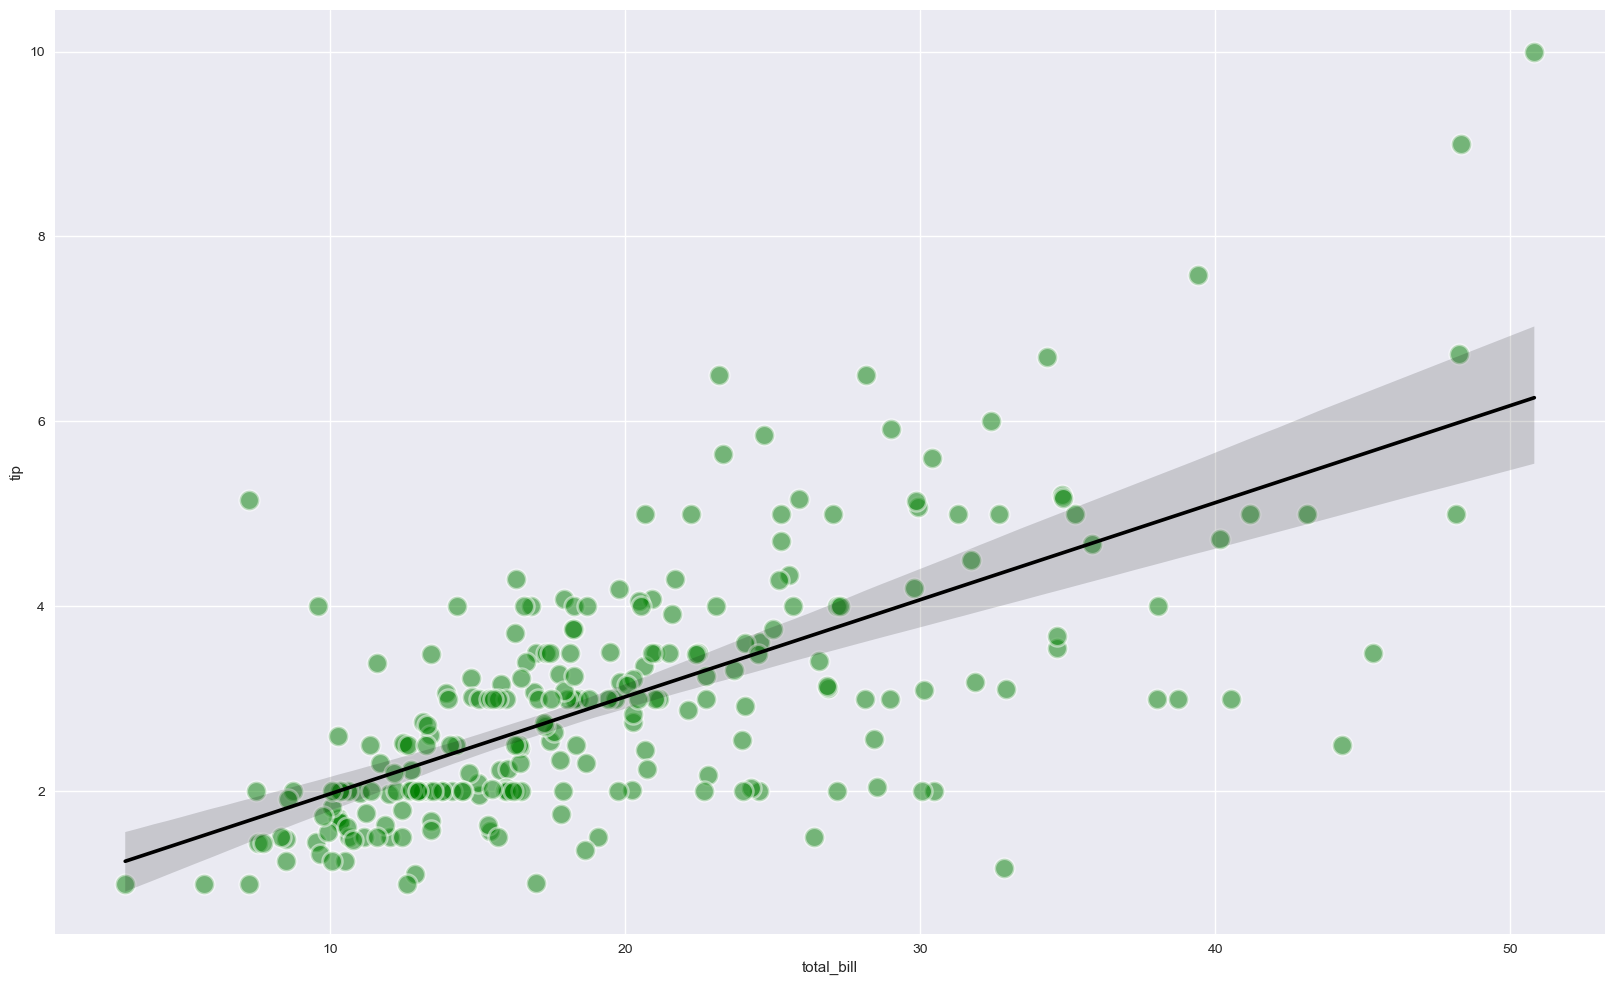

In [51]:
#Code Block 6
plt.figure(figsize=(20,12))
sns.regplot(x='total_bill', y='tip', data = df_tips, scatter_kws={"color":"green","alpha":0.5,"s":200, "linewidths":2,"edgecolor":"white"},
           line_kws={'color': 'black'})

In [53]:
#Code Block 7
X = df_tips['total_bill']
y = df_tips['tip']
X = sm.add_constant(X) # adding a constant

reg_tips = sm.OLS(y, X).fit()

predictions = reg_tips.predict(X) 
reg_tips.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     203.4
Date:                Wed, 11 Sep 2024   Prob (F-statistic):           6.69e-34
Time:                        21:29:56   Log-Likelihood:                -350.54
No. Observations:                 244   AIC:                             705.1
Df Residuals:                     242   BIC:                             712.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9203      0.160      5.761      0.000       0.606       1.235
total_bill     0.1050      0.007     14.260      0.000       0.091       0.120
==============================================================================
Omnibus:                       20.185   Durbin-Watson:                   2.151
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.750
Skew:                           0.443   Prob(JB):                     6.35e-09
Kurtosis:                       4.711   Cond. No.                         53.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### AIC and BIC penalizes you for complexity and rewards for the simplicity of the model.

<Axes: xlabel='total_bill', ylabel='tip'>

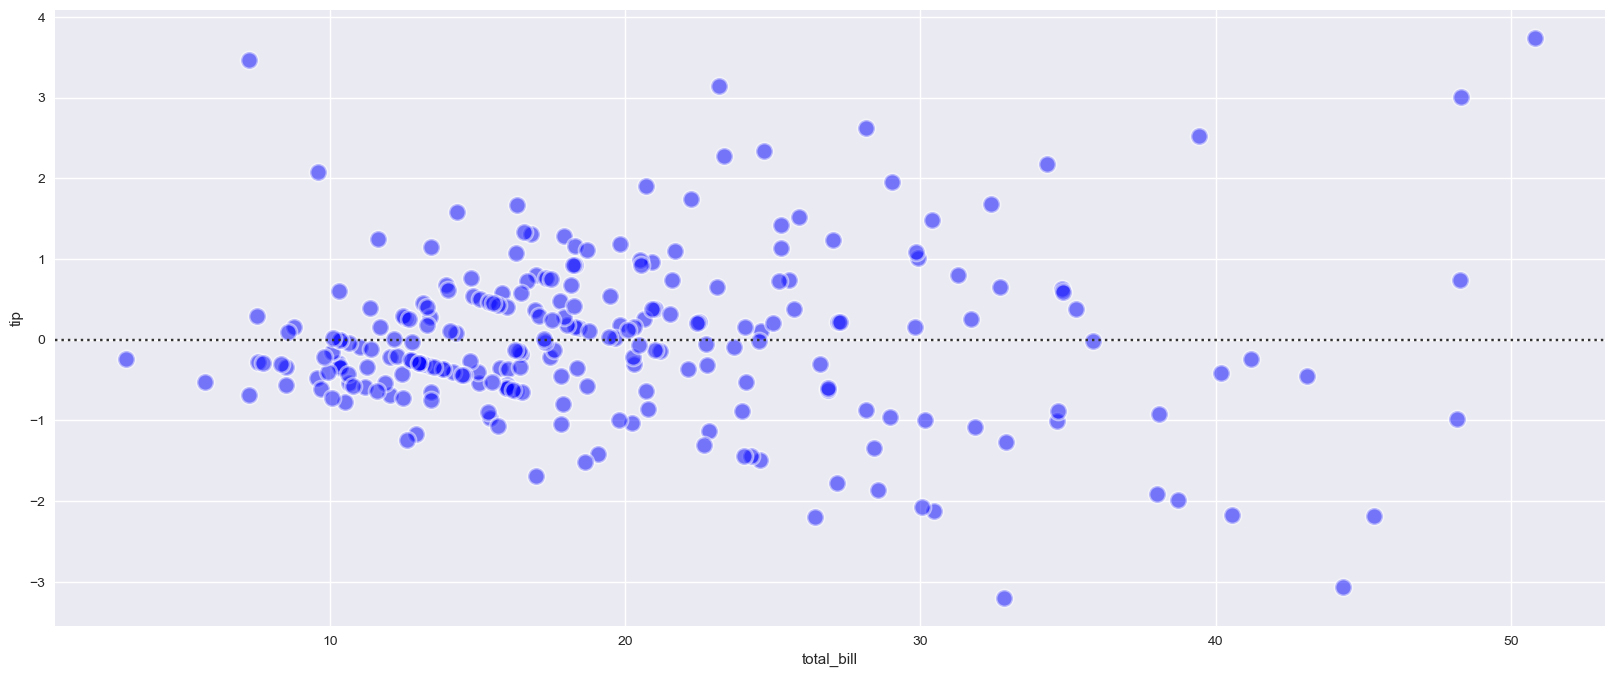

In [60]:
#Code Block 8
plt.figure(figsize=(20,8))
sns.residplot(x='total_bill', y='tip', data = df_tips, scatter_kws={"color":"blue","alpha":0.5,"s":150, "linewidths":2,"edgecolor":"white"},
           line_kws={'color': 'black'})

### Look at Amount Funded and Interest Rate
- Does amount funded have a relationship with Interest rate?
- The independent variable (feature) = Amount Funded
- The dependent variable (target variable) = Interest Rate

In [65]:
#Code Block 9
X = df['Annual Income']
y = df['Interest Rate']
X = sm.add_constant(X) # adding a constant

reg = sm.OLS(y, X).fit()

predictions = reg.predict(X) 
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Interest Rate   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     18.15
Date:                Thu, 12 Sep 2024   Prob (F-statistic):           2.05e-05
Time:                        19:50:41   Log-Likelihood:                -85667.
No. Observations:               30071   AIC:                         1.713e+05
Df Residuals:                   30069   BIC:                         1.714e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            13.8556      0.033    423.004      0.000      13.791      13.920
Annual Income -1.281e-06   3.01e-07     -4.260      0.000   -1.87e-06   -6.92e-07
==============================================================================
Omnibus:                      683.134   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              481.784
Skew:                           0.204   Prob(JB):                    2.41e-105
Kurtosis:                       2.533   Cond. No.                     1.48e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.48e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<h2 style="color:blue;">C1.S5.Py02 - How to create residuals and export to a DataFrame</h2>    

### Manually calculating residuals

In [68]:
#Code Block 10
df_simplereg = df[['Amount Funded', 'Interest Rate']]
df_simplereg.head()

Amount Funded  Interest Rate
6           7500           7.62
8          10000           6.03
4          15000          16.29
7          35000          21.49
9           3600          11.14

In [70]:
#Code Block 11
predictions = pd.DataFrame(predictions)
predictions=predictions.rename(columns = {0:'Interest_Pred'})
predictions.head()

Interest_Pred
6      13.737702
8      13.717204
4      13.763325
7      13.709518
9      13.772292

In [72]:
#Code Block 12
df_simplereg = pd.concat([df_simplereg, predictions], axis=1)
df_simplereg['Calc_Residual'] = df_simplereg['Interest Rate'] - df_simplereg['Interest_Pred']
df_simplereg.head(10)

Amount Funded  Interest Rate  Interest_Pred  Calc_Residual
6            7500           7.62      13.737702      -6.117702
8           10000           6.03      13.717204      -7.687204
4           15000          16.29      13.763325       2.526675
7           35000          21.49      13.709518       7.780482
9            3600          11.14      13.772292      -2.632292
10          24000          16.29      13.737702       2.552298
11          20000          15.31      13.771011       1.538989
12          21000           7.90      13.753076      -5.853076
13          20000           6.03      13.671084      -7.641084
16          16950          11.14      13.800477      -2.660477

### Calculate residuals using statsmodels

In [75]:
#Code Block 13
resid = reg.resid
resid

6       -6.117702
8       -7.687204
4        2.526675
7        7.780482
9       -2.632292
           ...   
30052   -1.668947
30056    2.529878
30059    5.262334
30064   -2.663039
30067   -0.641795
Length: 30071, dtype: float64

In [77]:
#Code Block 14
df_simplereg = pd.concat([df_simplereg, resid], axis=1)
df_simplereg=df_simplereg.rename(columns = {0:'Residual'})
df_simplereg.head()

Amount Funded  Interest Rate  Interest_Pred  Calc_Residual  Residual
6           7500           7.62      13.737702      -6.117702 -6.117702
8          10000           6.03      13.717204      -7.687204 -7.687204
4          15000          16.29      13.763325       2.526675  2.526675
7          35000          21.49      13.709518       7.780482  7.780482
9           3600          11.14      13.772292      -2.632292 -2.632292

<h2 style="color:blue;">C1.S5.Py03 - Graphically looking at y and its residuals</h2>    

<Axes: xlabel='Amount Funded', ylabel='Interest Rate'>

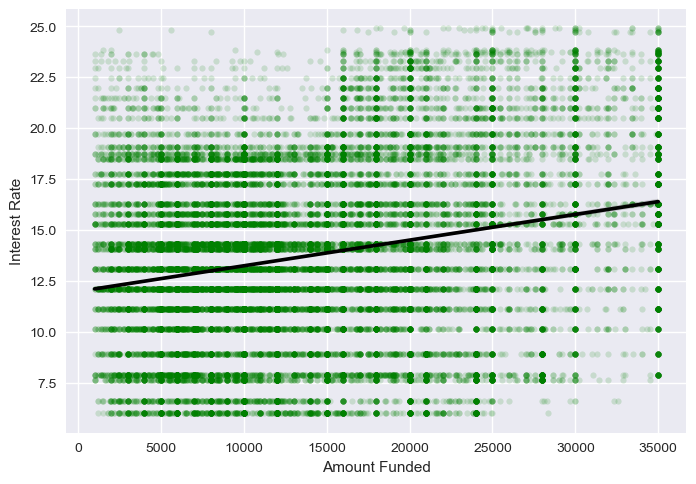

In [105]:
#Code Block 15
sns.regplot(x='Amount Funded', y='Interest Rate', data = df_simplereg, scatter_kws={"color":"green","alpha":0.15,"s":20},
           line_kws={'color': 'black'})

https://seaborn.pydata.org/generated/seaborn.residplot.html

<Axes: xlabel='Amount Funded', ylabel='Interest Rate'>

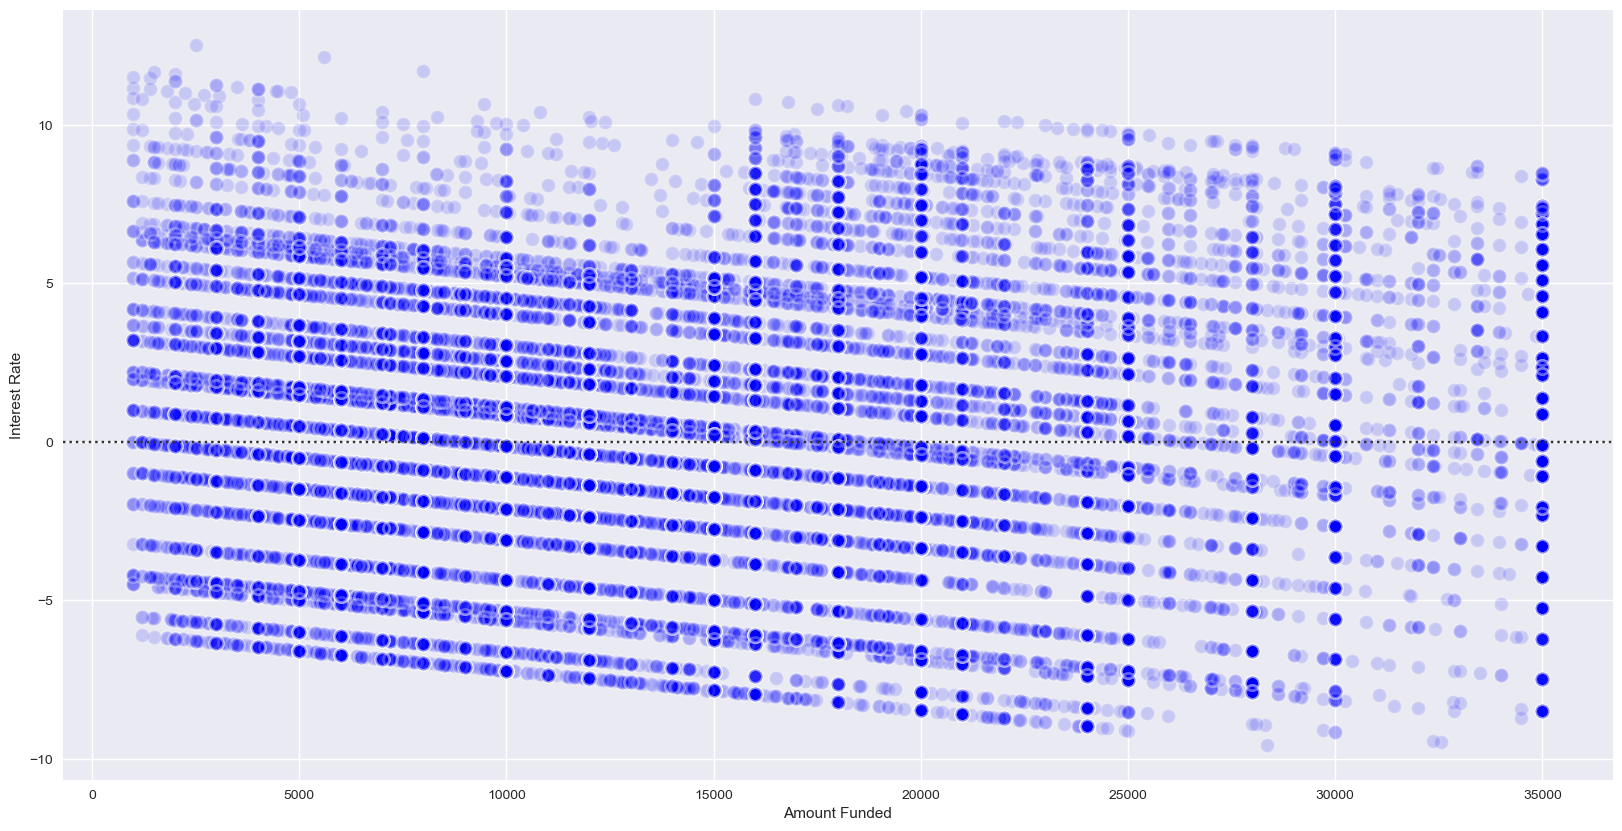

In [107]:
#Code Block 16
plt.figure(figsize=(20,10)) #changes area of scatterplot
sns.residplot(x='Amount Funded', y='Interest Rate', 
              data = df_simplereg, scatter_kws={"color":"blue","alpha":0.15, "s":100,"linewidths":2,"edgecolor":"white"}, 
              line_kws={'color': 'black'})

Text(0, 0.5, 'Actual Interest Rate')

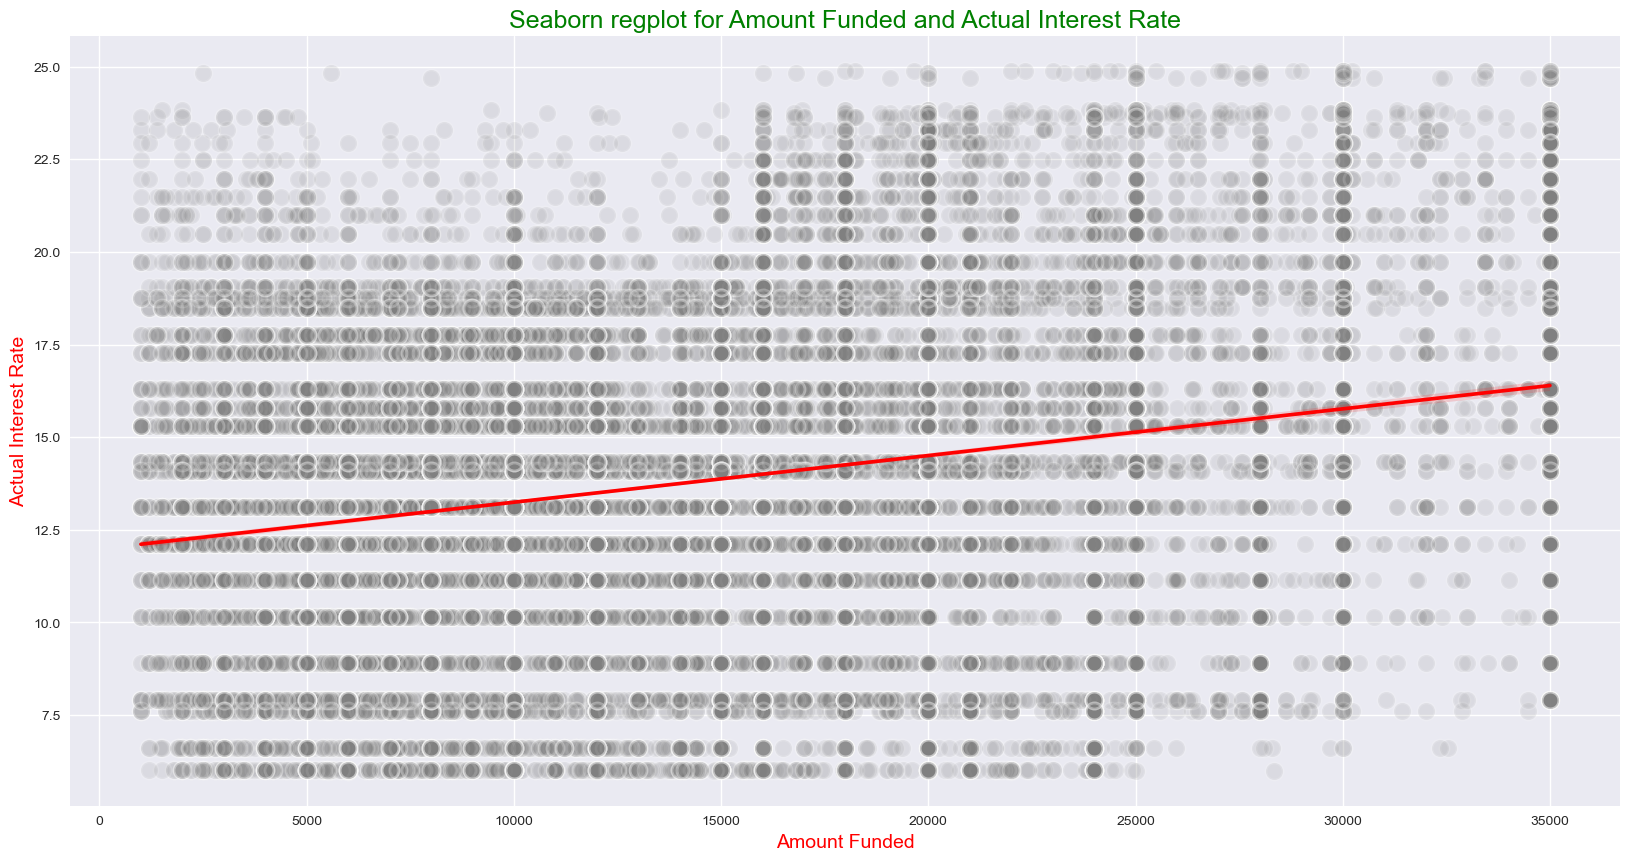

In [108]:
#Code Block 17
plt.figure(figsize=(20,10)) #changes area of scatterplot
sns.regplot(x='Amount Funded', y='Interest Rate', data = df, scatter_kws={"color":"grey","alpha":0.15,"s":150,"linewidths":2,"edgecolor":"white"},
           line_kws={'color': 'red'})
plt.title('Seaborn regplot for Amount Funded and Actual Interest Rate', color = 'green', fontsize='18')
plt.xlabel('Amount Funded', color = 'red', fontsize='14')
plt.ylabel('Actual Interest Rate', color = 'red', fontsize='14')

Text(38.32698784722223, 0.5, 'Actual Interest Rate')

<Figure size 2000x1000 with 0 Axes>

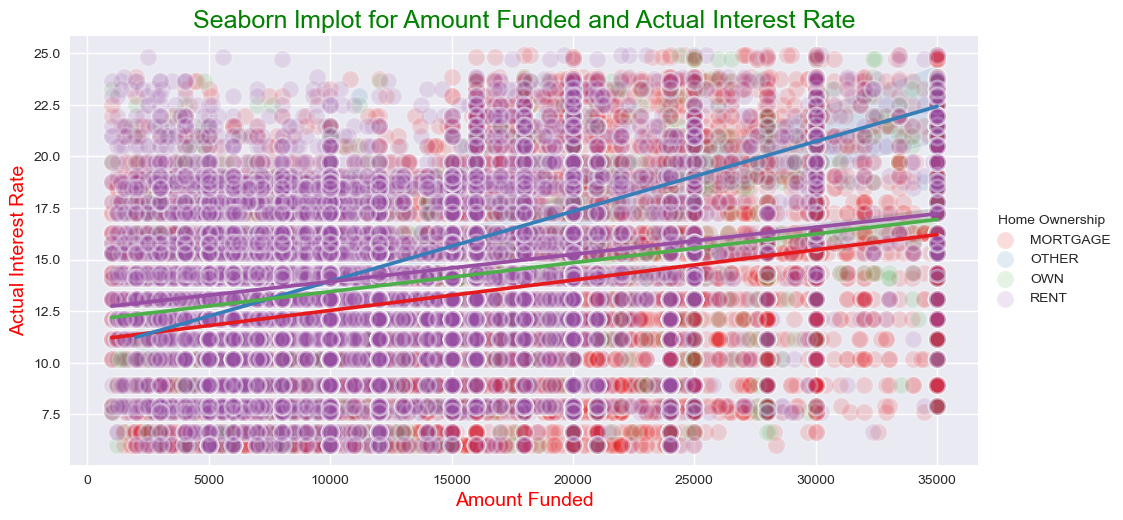

In [109]:
#Code Block 18
plt.figure(figsize=(20,10)) #changes area of scatterplot
sns.lmplot(x='Amount Funded', y='Interest Rate', hue="Home Ownership", data = df, palette="Set1", 
           aspect = 2, scatter_kws={"alpha":0.15,"s":150,"linewidths":2,"edgecolor":"white"})
plt.title('Seaborn lmplot for Amount Funded and Actual Interest Rate', color = 'green', fontsize='18')
plt.xlabel('Amount Funded', color = 'red', fontsize='14')
plt.ylabel('Actual Interest Rate', color = 'red', fontsize='14')

<Figure size 2000x1000 with 0 Axes>

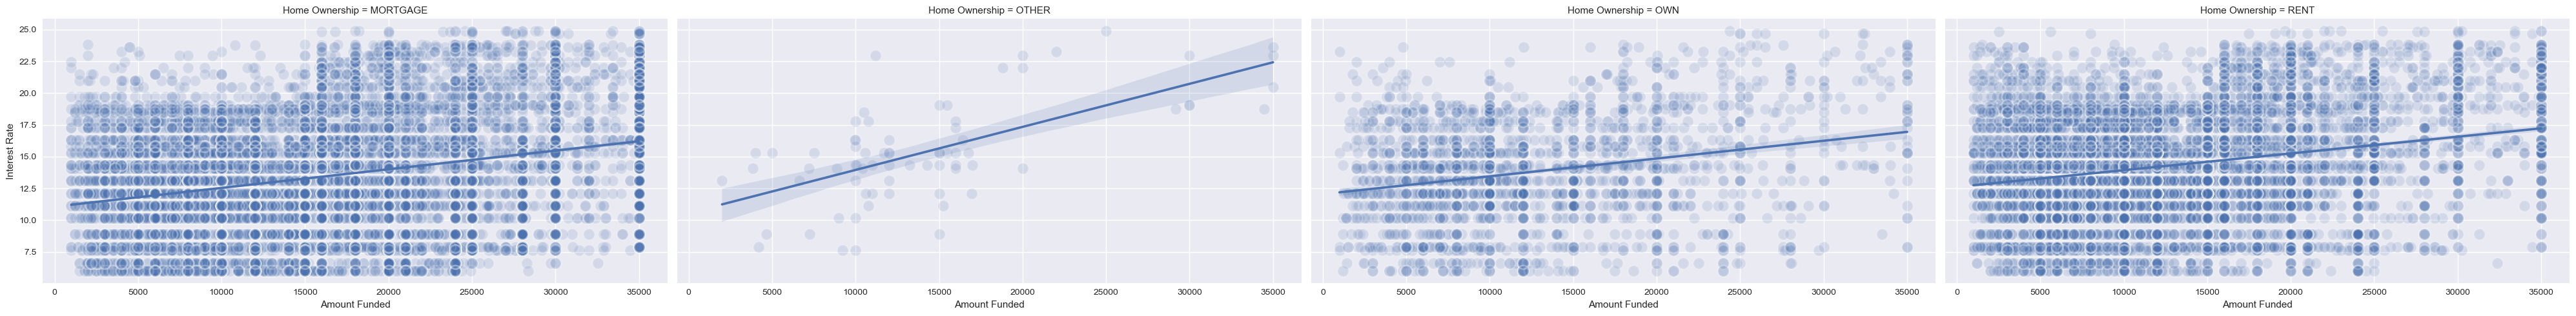

In [110]:
#Code Block 19
plt.figure(figsize=(20,10)) #changes area of scatterplot
sns.lmplot(x='Amount Funded', y='Interest Rate', col="Home Ownership", data = df, palette="Set1", 
           aspect = 2, scatter_kws={"alpha":0.15,"s":150,"linewidths":2,"edgecolor":"white"})

<Figure size 2000x1000 with 0 Axes>

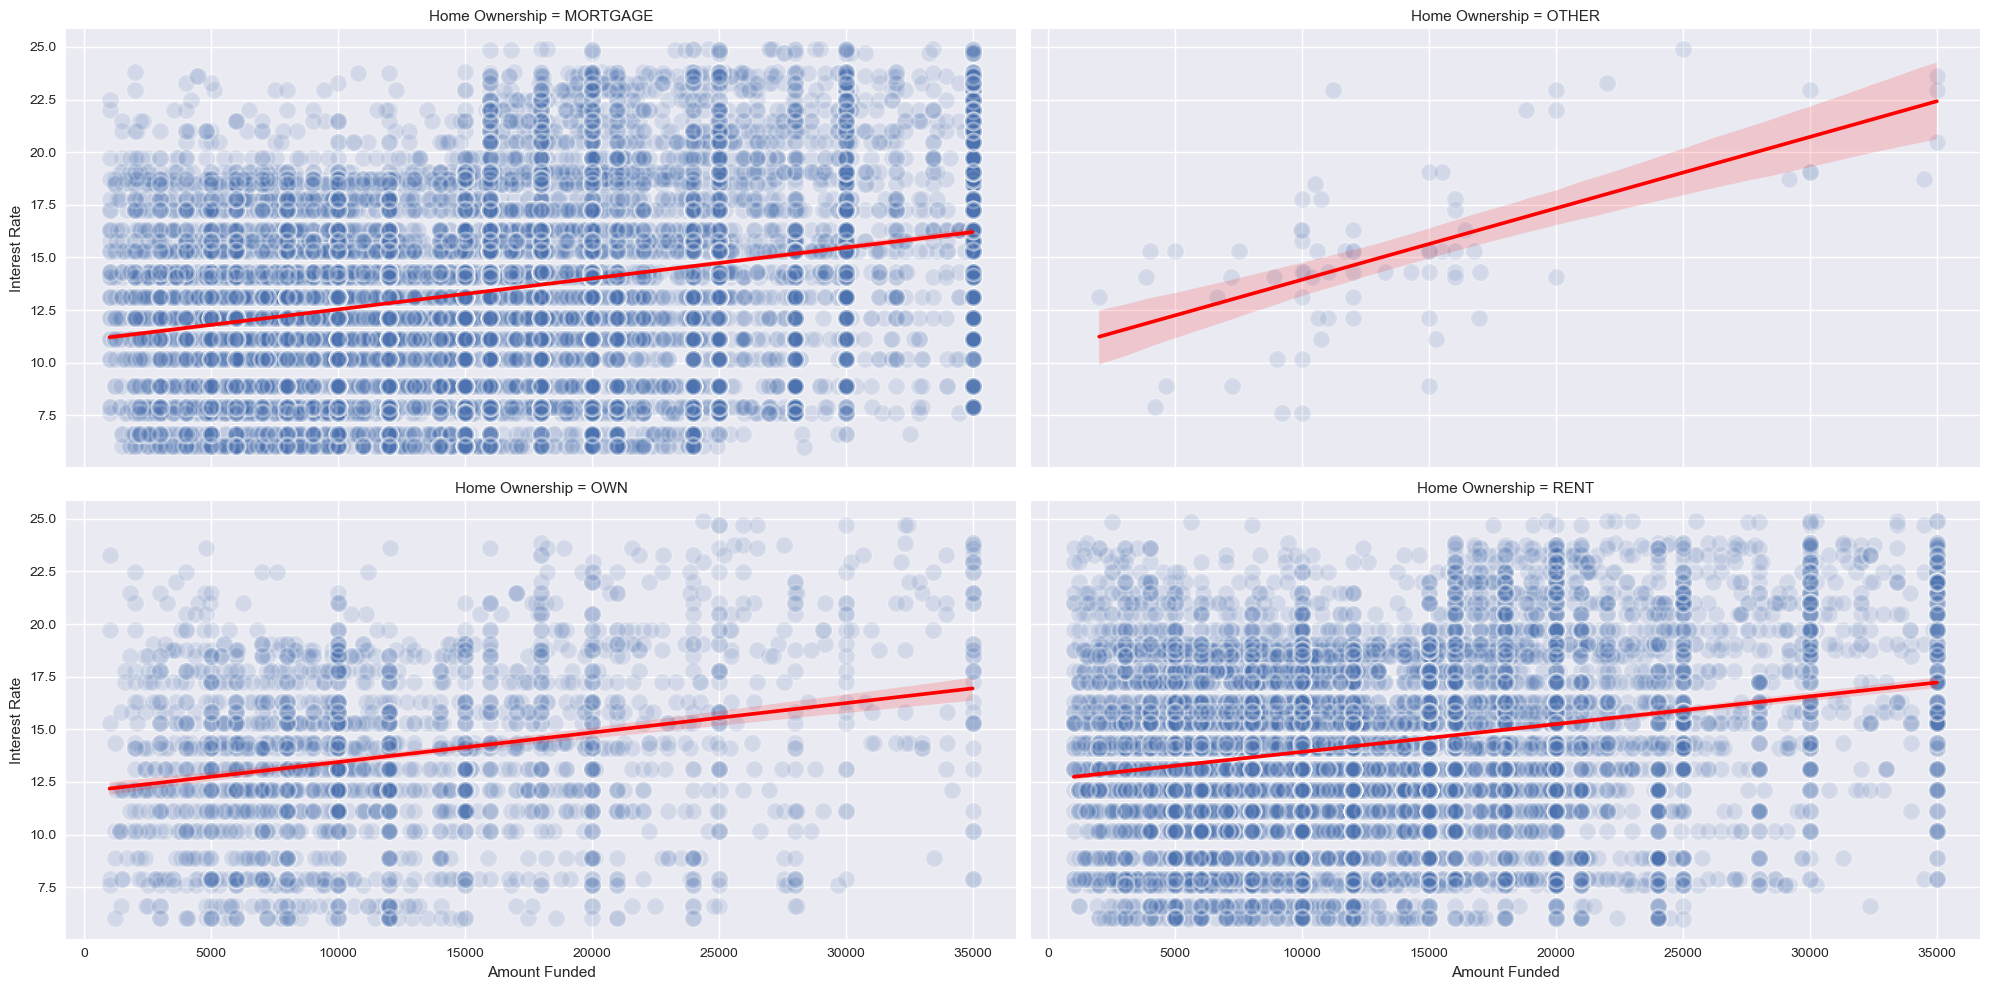

In [111]:
#Code Block 20
plt.figure(figsize=(20,10)) #changes area of scatterplot
sns.lmplot(x='Amount Funded', y='Interest Rate', col="Home Ownership", col_wrap=2, data = df, palette="Set1", 
           aspect = 2, scatter_kws={"alpha":0.15,"s":150,"linewidths":2,"edgecolor":"white"}, line_kws={'color': 'red'})